# Insights on Zomato Data

In [ ]:
# Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go 
# Graph Object Plotly sublibray
import re

# New Section

In [ ]:
# To Load Data
data = pd.read_excel(r'C:\Users\Harshavardhan\Desktop\Danny\IT Vedant\ML with Python Essentials\Zomato Data Project\zomato.xlsx')

In [ ]:
# DataSet Has 51717 rows and 17 Columns
data.shape

(51717, 17)

In [ ]:
# Dropping Irrelevant Columns in our Dataset
data.drop(['url', 'phone', 'menu_item','location','rest_type'], axis=1, inplace=True)

In [ ]:
data.rename(columns={"listed_in(type)":"rest_type",
                     "listed_in(city)":"location",
                     "approx_cost(for two people)":"cost"},inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)
# to Remove Null Values
data.shape
# new shape

(51667, 12)

In [ ]:
# Removing Null Values from these columns
data=data[data.cuisines.isna()==False]
data=data[data.rate.isna()==False]
data=data[data.cost.isna()==False]

In [ ]:
data.isna().sum()

address             0
name                0
online_order        0
book_table          0
rate             7765
votes               0
dish_liked      28041
cuisines           45
cost              345
reviews_list        0
rest_type           0
location            0
dtype: int64

In [ ]:
# Restaurant Name can be repeated due to multiple branches in State.
# But one branch will have one only 1 Address
# So, By filtering on Address we can delete repeated Restaurant Data
data.drop_duplicates(["name","address"],inplace=True)

**1) Top 5 Restaurants by Count**

In [ ]:
restro5 = data.groupby('name')['name'].count().sort_values(ascending=False).head(5)

fig = px.bar(restro5,
color_discrete_sequence =['cadetblue']*len(restro5),
title = "Top 5 Restaurants by Count",
orientation='h',
labels = {"value":"Count","index":"Restaurant"})
fig.update_layout(showlegend=False)

**2) Top 5 Voted Restraunts**

In [ ]:
votedresto5 = data.sort_values(by=["votes"],ascending=False).head(5)
px.bar(votedresto5,
       x="name",
       y="votes",
       title ="Top 5 Voted Restraunts",
       labels={"name":"Restaurant","votes":"Votes"}
      )

**3) Distribution of ratings by Counts**

In [ ]:
rates= []
pattern = "^[^ /]*"
for i in data["rate"].fillna(float("NaN")).replace("NEW",float("NaN")).replace("-",float("NaN")):
        rate1 = re.findall(pattern,str(i))
        rates.extend(rate1)

data["rate"]= rates
rateareadata = data.groupby('rate')['name'].count()
fig = px.area(rateareadata,
              title="Distribution of Rating",
              markers=True,labels={"value":"Count","rate":"Rating"},
              range_x=[10,25])
fig.update_layout(showlegend=False)
fig.show()
print("Mean : ",data.rate.describe().top)

Mean :  3.7


C:\Users\Harshavardhan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



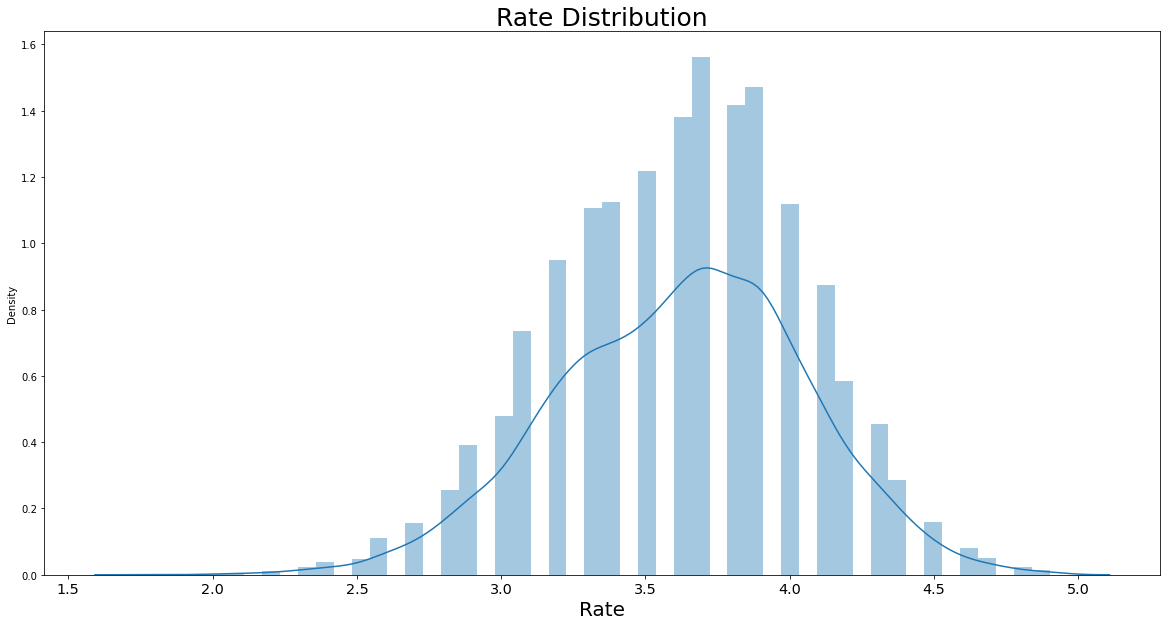

In [ ]:
x=data.rate.sort_values()
data1= [x]
plt.figure(figsize=(20,10))
sns.distplot(data1)
plt.title('Rate Distribution', fontsize=25)
plt.xlabel('Rate', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

**4) Top 10 Cities with Most Restraunts**

In [ ]:
funneldata = data.groupby("location")["name"].count().sort_values(ascending = False).head(10)
fig = px.funnel(funneldata,title="Top 10 Cities with Most Restraunts",
                labels={"location":"City"}) 
fig.update_layout(showlegend=False)

**5) Top 3 Cuisines Across Restaurants**

In [ ]:
counta=countb=countc=0
for i in data["cuisines"]:
    a = "North Indian"
    b = "South Indian"
    c = "Chinese"
    if("North Indian" in str(i)):
        counta = counta+1
    if("South Indian" in str(i)):
        countb = countb+1
    if("Chinese" in str(i)):
        countc = countc+1
cuisineslst1 = ["North Indian","South Indian","Chinese"]
cuisineslst2 = [counta,countb,countc]

px.bar(x=cuisineslst1,
       y=cuisineslst2,
       labels={"x":"Cuisines","y":"Number of Restro"},
       title="Top 3 Cuisines Across Restaurants")

**6) Top 5 Main-Course Liked Indian Dishes**

In [ ]:
counta=countb=countc=countd=counte=0
for i in data["dish_liked"]:
    if("Biryani" in str(i)):
        counta = counta+1
    if("Paratha" in str(i)):
        countb = countb+1
    if("Thali" in str(i)):
        countc = countc+1
    if("Rice" in str(i)):
        countd = countd+1
    if("Roti" in str(i)):
        counte = counte+1
dishlst1 = ["Biryani","Paratha","Thali","Rice","Roti"]
dishlst2 = [counta,countb,countc,countd,counte]

px.bar(x=dishlst1,y=dishlst2,labels={"x":"Dishes","y":"Likes"})

**7) Top 5 Liked BreakFast**

In [ ]:
counta=countb=countc=countd=counte=0
for i in data["dish_liked"]:
    if("Coffee" in str(i)):
        counta = counta+1
    if("Sandwich" in str(i)):
        countb = countb+1
    if("Tea" in str(i)):
        countc = countc+1
    if("Dosa" in str(i)):
        countd = countd+1
    if("Vada" in str(i)):
        counte = counte+1
dishlst1 = ["Coffee","Sandwich","Tea","Dosa","Vada"]
dishlst2 = [counta,countb,countc,countd,counte]

px.bar(x=dishlst2,y=dishlst1,orientation="h",labels={"x":"Likes","y":"BreakFast"})

**8) Top 5 Liked Fast Food**

In [ ]:
counta=countb=countc=countd=counte=0
for i in data["dish_liked"]:
    if("Pizza" in str(i)):
        counta = counta+1
    if("Pasta" in str(i)):
        countb = countb+1
    if("Burger" in str(i)):
        countc = countc+1
    if("Cocktails" in str(i)):
        countd = countd+1
    if("Fries" in str(i)):
        counte = counte+1
dishlst1 = ["Pizza","Pasta","Burger","Cocktails","Fries"]
dishlst2 = [counta,countb,countc,countd,counte]

px.bar(x=dishlst1,y=dishlst2,labels={"x":"Fast Food","y":"Likes"})

**9) Top 20 restaurants by name**

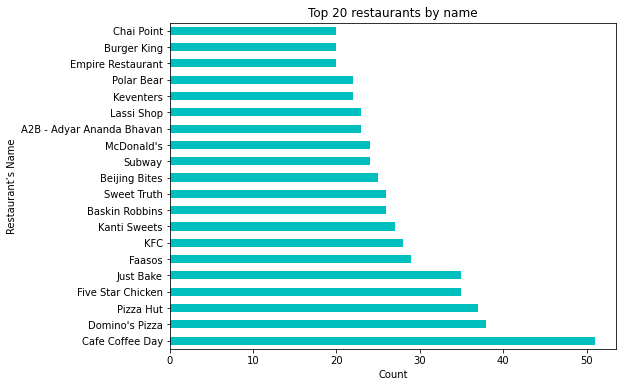

In [ ]:
top20name=data.name.value_counts().head(20)
plt.figure(figsize=(8,6))
ax=top20name.plot(kind="barh",color="c")
plt.title("Top 20 restaurants by name")
plt.ylabel("Restaurant’s Name")
plt.xlabel("Count")
plt.show()

**10) Online Orders Counts**

In [ ]:
piedata = data.online_order.value_counts()
px.pie(piedata,values=piedata.values,
       title="How many Restaurants accept Online Orders?",
       names=piedata.index,
       hover_name=piedata.index,hole = 0.4)
# YES has the most counts

**11) Rate vs Votes**

In [ ]:
px.scatter(data,
             x=data.rate.sort_values(),
             y=data.votes,title="Rate vs Votes",range_x=[0,30],labels={"x":"Rate"})
# We can conclude through this most votes in the range of 3 to 4.5
# also rate and votes are not diretly propotional to each other.

**12) Rate vs Cost**

In [ ]:
px.scatter(data,
             x=data.rate.sort_values(),
             y=data.cost,title="Rate vs Cost",range_x=[0,30],
           labels={"cost":"Cost","x":"Rating"})
# Most customers prefer mid range cost restro 
# More the cost is Higher is the ratings

**13) Book Table Counts**

In [ ]:
booktable = data.book_table.value_counts()
fig = go.Figure(data=[go.Pie(labels=booktable.index,
                             values=booktable.values,
                             pull=[0.17, 0],
                             title="How much Percent of Restaurants allow to Book Table?")])
fig.show()
# Less than even 10 percent

**14) Top 10 Locations with Most Restaurants**

In [ ]:
piedata = data.location.value_counts()[:10]
fig = go.Figure(data=[go.Pie(labels=piedata.index,
                             values=piedata.values,
                             pull=[0.1,0,0,0,0,0,0,0,0,0],
                             title="Top 10 Locations with Most Restaurants",rotation=45)])
fig.show()
print("Most Restaurants are in",data.location.describe().top)
print("There are a total of",data.location.describe().freq,"Restaurants")

Most Restaurants are in BTM
There are a total of 1200 Restaurants


**15) Restaurants in All Locations**

In [ ]:
piedata = data.location.value_counts()
fig = go.Figure(data=[go.Pie(labels=piedata.index,
                             values=piedata.values,
                             pull=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             rotation=75,hole = 0.3)])
fig.show()

fig1 = px.bar(piedata,title="Restaurants in All Locations",
              labels={"value":"Restaurants","index":"Locations"})
fig1.update_layout(showlegend=False)
fig1.show()

**16) Restaurant Type Distribution**

In [ ]:
resttype = data.rest_type.value_counts()
fig = go.Figure(data=[go.Pie(labels=resttype.index,
                             values=resttype.values,
                             pull=[0.05,0,0,0,0,0,0])])
fig.show()
print("Most Restaurants are",data.rest_type.describe().top,"type")
print("There are a total of",data.rest_type.describe().freq,"Restaurants in this Category")

fig1 = px.funnel(resttype,title="Restaurant Type Distribution",
              labels={"index":"Restaurant Type"})
fig1.update_layout(showlegend=False)
fig1.show()

Most Restaurants are Delivery type
There are a total of 7116 Restaurants in this Category


**17) Average Cost for 2 Persons**

In [ ]:
costdata = data.cost.value_counts().head(15)
fig = px.bar(costdata,title="Average cost for two Person",
             labels={"index":"Cost","value":"Restaurant count"})
fig.show()
print("The Average Cost for 2 Person at a Restaurant is",data.cost.median())

The Average Cost for 2 Person at a Restaurant is 400.0


**18) Percenatage of Cost for 2 People**

In [ ]:
fig = go.Figure(data=[go.Pie(labels=costdata.index,
                             values=costdata.values,
                       pull=[0.01,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30,0.33,0.36,0.39,0.41],
                             title="Percenatage of Cost for 2 People")])
fig.show()
print("Average cost for 2 is around 300-400 for 32.6% restaurants")

Average cost for 2 is around 300-400 for 32.6% restaurants


**19) Rate vs Online order**

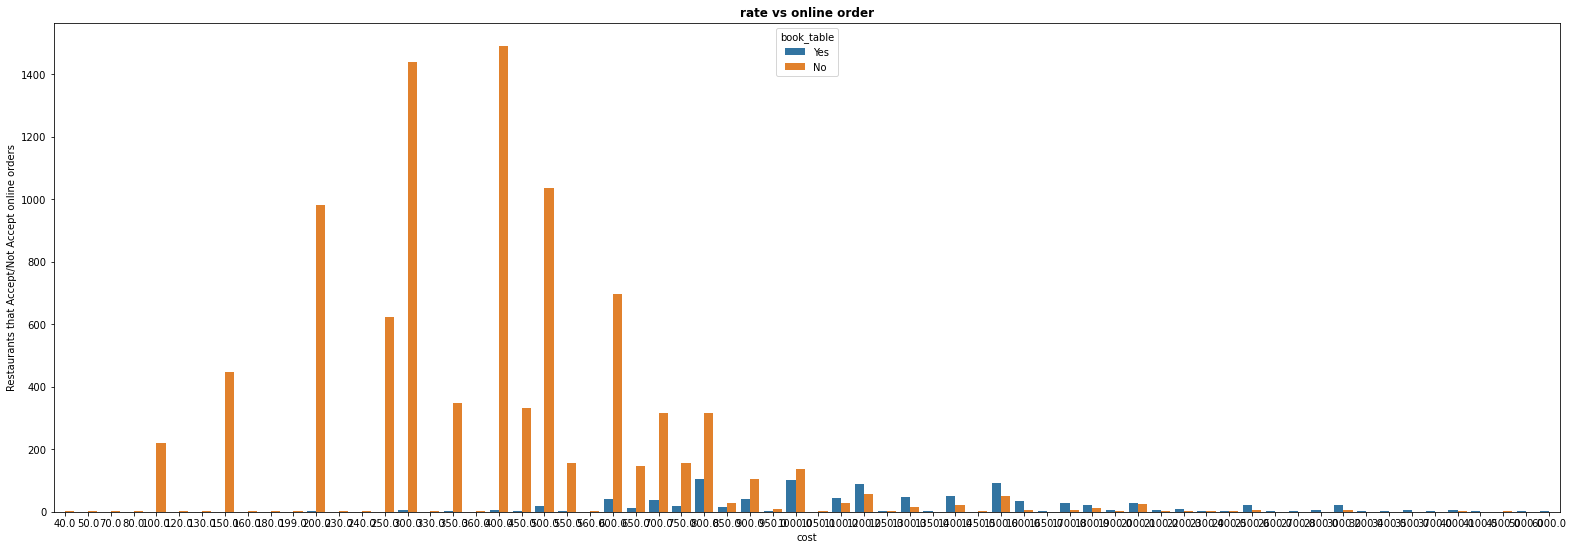

In [ ]:
plt.subplots(figsize=(27,9))
sns.countplot(x=data.cost.sort_values(),
              data=data,
              hue='book_table')
plt.ylabel("Restaurants that Accept/Not Accept online orders")
plt.title("rate vs online order",weight = 'bold')
plt.show()